In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

https://github.com/madmaze/pytesseract

In [2]:
!pip install google-colab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 KB 556.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 KB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.5/104.5 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 29.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.2/484.2 KB 31.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.4/245.4 KB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━

In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract




tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [4]:
import pytesseract

import shutil

import os

import random

try:
  from PIL import Image
except ImportError:
  import Image

## Imports

In [5]:
import pytesseract
import numpy as np
import random
import cv2
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from google.colab.patches import cv2_imshow

/opt/conda/lib/python3.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


## Reading the magdata files

In [6]:
receipt_files=glob('../input/magdata/*')
receipt_files[:2]

['../input/magdata/5_page-0009.jpg', '../input/magdata/4_page-0009.jpg']

## Overview of the dataset

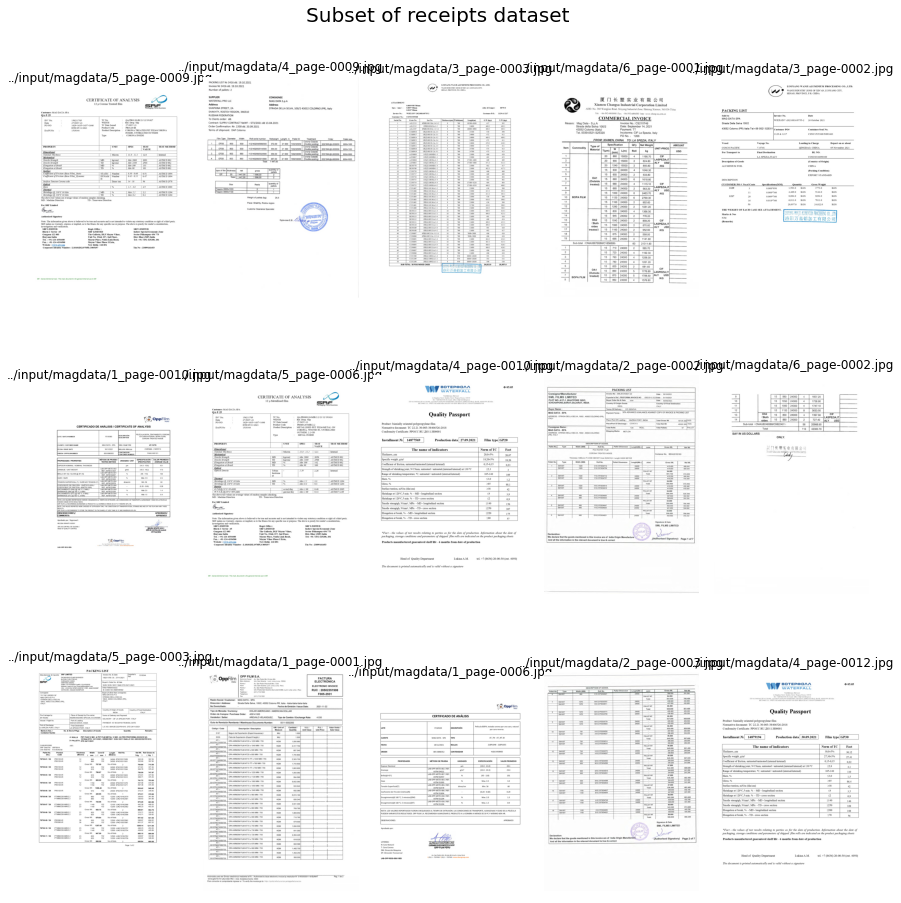

In [7]:
fig = plt.figure(figsize=(15,15))
size1, size2 = 3,5
plt.suptitle( 'Subset of receipts dataset' , fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95, wspace=0.1, hspace=0)
ind = 1
for i in range(size1):
    for j in range(size2):
        plt.subplot(size1,size2,ind)
        path = receipt_files[ind-1]
        ind += 1
        image = Image.open(path)#skimage.io.imread(path)
        plt.imshow(image)#.astype(np.uint8))
        plt.title(path.split('\\')[-1])
        plt.axis('off')
plt.show()

## Tesseract OCR

### Preprocessing can be applied before feeding to the model

PACKING LIST Ne 3416 dd. 19.10.2021
Invoice Ne 3416 dd. 19.10.2021
Number of pallets: 2

SUPPLIER CONSIGNEE

WATERFALL PRO LLC MAG DATA S.p.A

Address Address

SHAPKINA STREET, 2A STRADA DELLA SELVA, 100/2 43052 COLORNO (PR), Italy

SHAKHTY, ROSTOV REGION, 346510

RUSSIAN FEDERATION

To Clients order: dd.

Contract: SUPPLY CONTRACT NeWF — 573/2021 dd 13.04.2021
Order Confirmation: Nr. 2200 dd. 20.09.2021

Terms of shipment: DAP Colorno

        

Roll serialnumber __Netweight_Lenght,m Pallet ID Treatment Order Pallet size

Corona Outside
112140204/008/000 100232959 | (Double-sealing) | 2021B®L\-002200 | _800x1100

Corona Outside

112140205/014/000 100232959 | (Double-sealing) | 2021B®L\5-002200 | 800x1100
Corona Outside

112140208/002/000 100233050 | (Double-sealing) | 2021BOL\5-002200 | 800x1000

Corona Outside
112140208/001/000 100233050 | (Double-sealing) | 2021B®L\b-002200 | 800x1000

Total: 1 447,00

quantity of
gree pallets
1447,00, 1 598,00 2

Total:[ 1 447,00 | 1598,00 2 |

qua

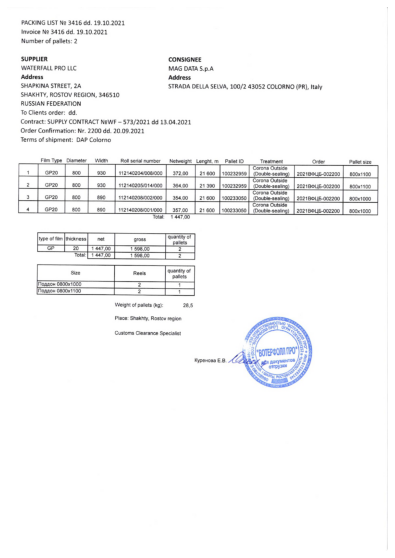

In [8]:
receipt_0=Image.open(receipt_files[1])
print(pytesseract.image_to_string(receipt_0))
plt.figure(figsize=(10,10))
plt.imshow(receipt_0)
plt.axis('off')
plt.show()

Tesseract OCR is also able to locate the character on the image.

## Bounding boxes

23175
h 1765 w 1236


(-0.5, 1235.5, 1764.5, -0.5)

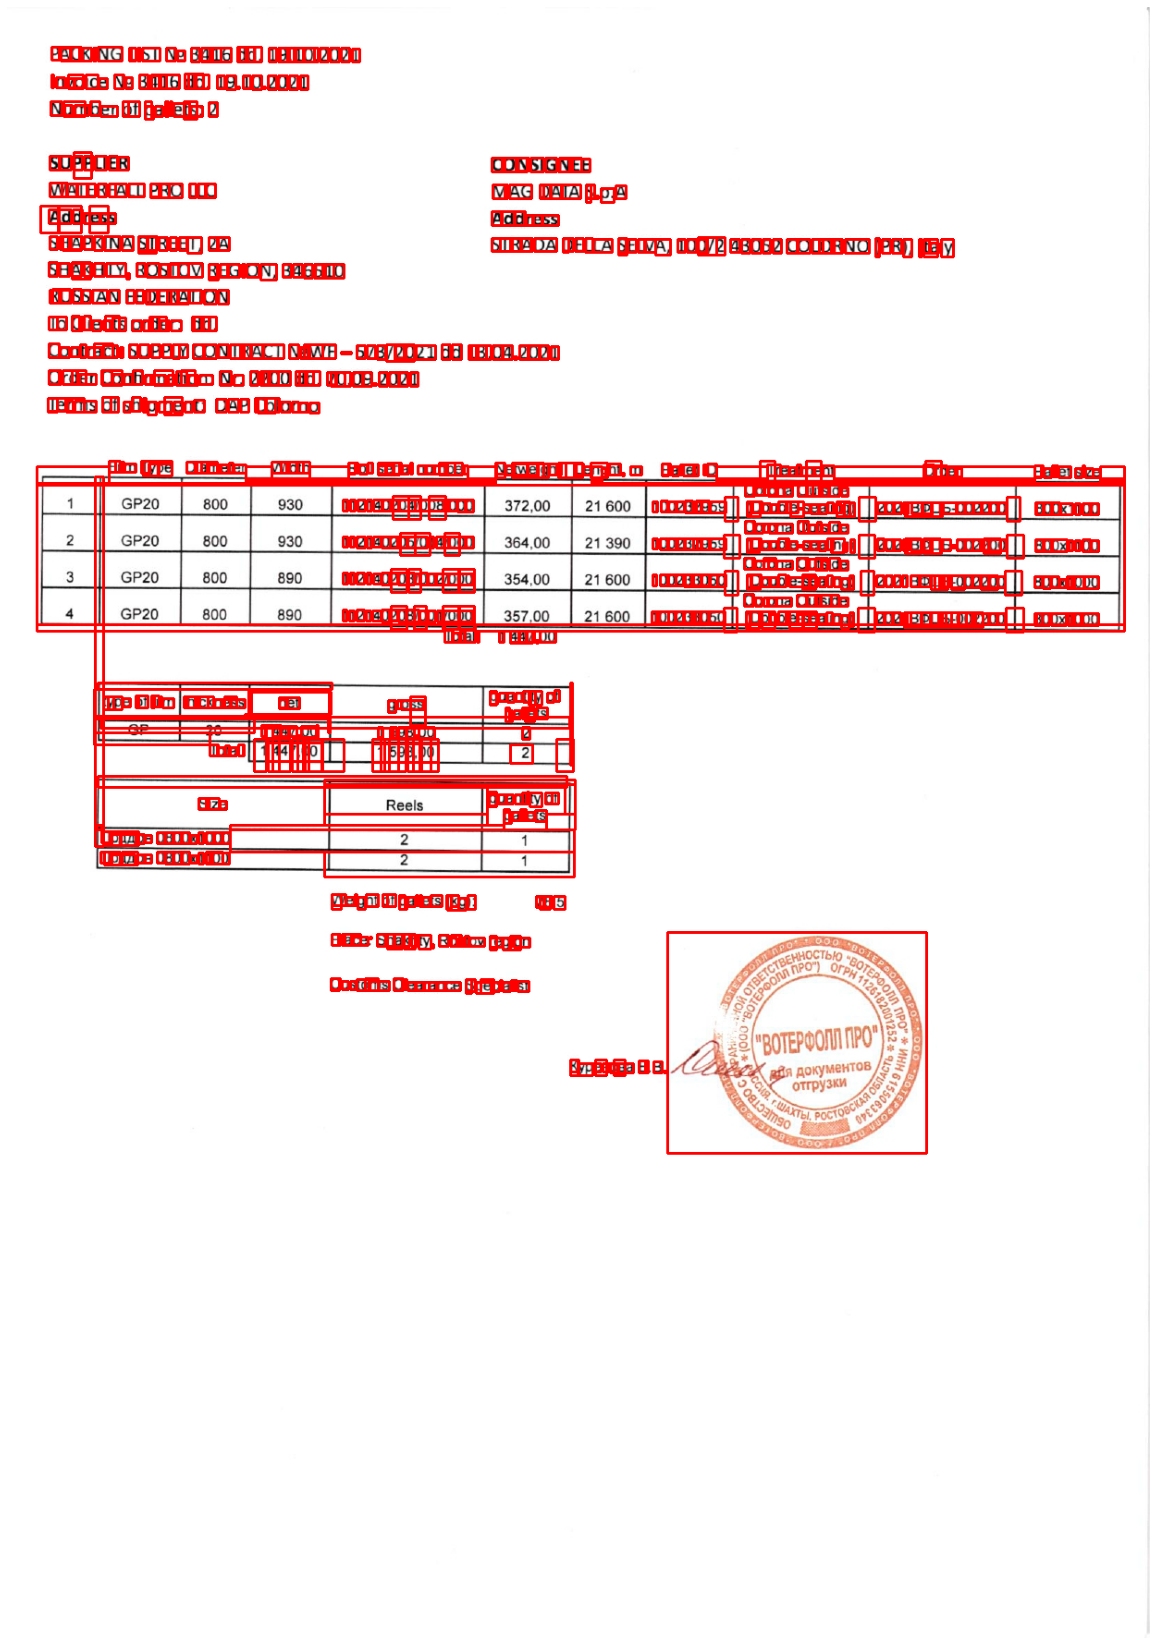

In [9]:
#  get characters and correspongding position
ocr_out = pytesseract.image_to_boxes(receipt_0)
# print(pytesseract.image_to_data(receipt_0))
print(len(ocr_out))

#  plot position of each character detected on the image
img = cv2.imread(receipt_files[1])
h, w, _ = img.shape
print("h",h,"w",w)
for bbox in ocr_out.split('\n')[:-1]:
    split = bbox.split(' ')
#     print(split)
    text = split[0]
#     print(text)
    point1 = (int(split[1]), h - int(split[2]))
    point2 = (int(split[3]), h - int(split[4]))
    img = cv2.rectangle(img,point1,point2,(255,0,0),2)
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.axis('off')


# img = cv2.imread(receipt_files[3])
# h, w, _ = img.shape
# for b in ocr_out.splitlines():
#     b = b.split(' ')
#     img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
# cv2_imshow(img)

## get the data including boxes, confidences, line and page numbers

In [10]:
a=pytesseract.image_to_data(receipt_0)
print(a)

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1236	1765	-1	
2	1	1	0	0	0	47	43	334	78	-1	
3	1	1	1	0	0	47	43	334	78	-1	
4	1	1	1	1	0	48	43	333	16	-1	
5	1	1	1	1	1	48	43	76	15	96	PACKING
5	1	1	1	1	2	132	44	33	14	96	LIST
5	1	1	1	1	3	172	44	20	14	58	Ne
5	1	1	1	1	4	199	44	43	15	96	3416
5	1	1	1	1	5	249	43	26	16	96	dd.
5	1	1	1	1	6	283	44	98	15	96	19.10.2021
4	1	1	1	2	0	48	72	277	17	-1	
5	1	1	1	2	1	48	73	60	15	95	Invoice
5	1	1	1	2	2	116	73	19	15	83	Ne
5	1	1	1	2	3	143	73	43	15	96	3416
5	1	1	1	2	4	192	72	26	16	96	dd.
5	1	1	1	2	5	227	74	98	15	0	19.10.2021
4	1	1	1	3	0	47	102	180	19	-1	
5	1	1	1	3	1	47	102	72	16	96	Number
5	1	1	1	3	2	125	102	18	16	96	of
5	1	1	1	3	3	149	102	62	19	96	pallets:
5	1	1	1	3	4	218	103	9	15	96	2
2	1	2	0	0	0	36	157	987	113	-1	
3	1	2	1	0	0	46	157	584	28	-1	
4	1	2	1	1	0	46	157	584	28	-1	
5	1	2	1	1	1	46	157	85	28	96	SUPPLIER
5	1	2	1	1	2	524	163	106	15	92	CONSIGNEE
3	1	2	2	0	0	46	190	623	21	-1	
4	1	2	2	1	0	46	190	623	21	-1	
5	1	2	

## XML data

In [11]:
xml = pytesseract.image_to_alto_xml(receipt_0)
print(xml)

b'<?xml version="1.0" encoding="UTF-8"?>\n<alto xmlns="http://www.loc.gov/standards/alto/ns-v3#" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.loc.gov/standards/alto/ns-v3# http://www.loc.gov/alto/v3/alto-3-0.xsd">\n\t<Description>\n\t\t<MeasurementUnit>pixel</MeasurementUnit>\n\t\t<sourceImageInformation>\n\t\t\t<fileName></fileName>\n\t\t</sourceImageInformation>\n\t\t<OCRProcessing ID="OCR_0">\n\t\t\t<ocrProcessingStep>\n\t\t\t\t<processingSoftware>\n\t\t\t\t\t<softwareName>tesseract 4.1.1</softwareName>\n\t\t\t\t</processingSoftware>\n\t\t\t</ocrProcessingStep>\n\t\t</OCRProcessing>\n\t</Description>\n\t<Layout>\n\t\t<Page WIDTH="1236" HEIGHT="1765" PHYSICAL_IMG_NR="0" ID="page_0">\n\t\t\t<PrintSpace HPOS="0" VPOS="0" WIDTH="1236" HEIGHT="1765">\n\t\t\t\t<ComposedBlock ID="cblock_0" HPOS="47" VPOS="43" WIDTH="334" HEIGHT="78">\n\t\t\t\t\t<TextBlock ID="block_0" HPOS="47" VPOS="43" WIDTH="334" HEIGHT="

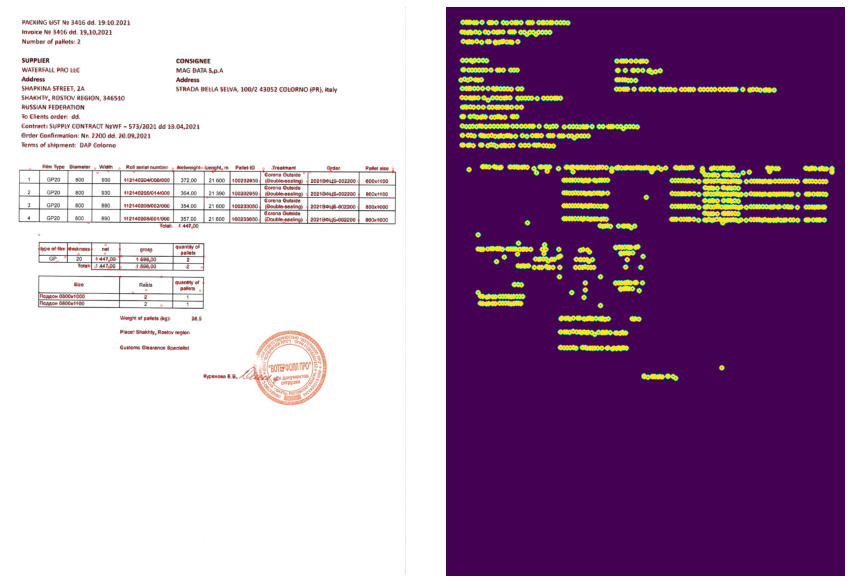

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(15,10))

plt.tight_layout()
plt.subplots_adjust(top=0.95, wspace=0.1, hspace=0)

points = []
for bbox in ocr_out.split('\n')[:-1]:
  # print(bbox)
  split = bbox.split(' ')
  text = split[0]
  point1 = (int(split[3]) + int(split[1])) / 2
  point2 =  (h -  int(split[4]) + h - int(split[2]))/2
  # print(text, point1, point2)
  points.append([point1,point2])
# print(points)
img = cv2.imread(receipt_files[1])
white = np.zeros((h,w))
for point in points:
    x = int(point[0])
    y = int(point[1])
    img = cv2.circle(img, (x,y) , 3, (255,0,0))
    white = cv2.circle(white, (x,y) , 5, (255,255,255), 6)

plt.subplot(1,2,1)
#plt.title()
plt.imshow(img)
plt.axis('off')    

plt.subplot(1,2,2)
plt.imshow(white)
plt.axis('off')

plt.show()

O the left  you will find out the position of each character found by Tesseract OCR.Because I feel the location of the single character is not very useful. Soo the character belonging to the same word are closed to each other on the right image.

## DBSCAN

In [13]:
clustering = DBSCAN(eps=27, min_samples=2).fit_predict(points)

In [14]:
# Just for nice plotting get a color for each cluster 
dico_color = {}
for i in range(np.max(clustering)+1):
    dico_color[i] = (random.randint(0,255),random.randint(0,255),random.randint(0,255))

## clusters

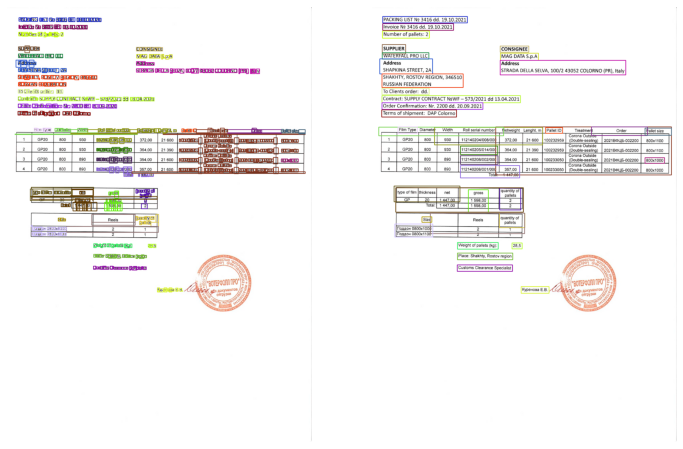

In [15]:
# Plot clusters
plt.figure(figsize=(12,16))
img = cv2.imread(receipt_files[1])
h, w, _ = img.shape

# plot a rectangle around each character with the color of the cluster
for en,bbox in enumerate(ocr_out.split('\n')[:-1]):
    split = bbox.split(' ')
    text = split[0]
    bottom_left = (int(split[1]), h - int(split[2]))
    top_right = (int(split[3]), h -  int(split[4]))
    if clustering[en] != -1:
        img = cv2.rectangle(img, bottom_left, top_right, dico_color[clustering[en]], 2)

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

#  plot a rectangle around each cluster 
img = cv2.imread(receipt_files[1])
dico_area_location = {} #  store location of each cluster for the following
for i in range(np.max(clustering)+1):
    wh = np.where(clustering==i) #  select points from cluster i
    arr = np.array(ocr_out.split('\n'))[wh]
    LX,LY = [], []
    for en,bbox in enumerate(arr):
        split = bbox.split(' ')       
        LX.append(int(split[1]))
        LX.append(int(split[3]))   
        LY.append( h - int(split[2]))
        LY.append( h - int(split[4]))
    bottom_left = (min(LX)-5,min(LY)-5) # among every character in the cluster, take min(x), min(y)
    top_right = (max(LX)+5,max(LY)+5) # among every character in the cluster, take max(x), max(y)
    dico_area_location[i] = [bottom_left, top_right]

    img = cv2.rectangle(img, bottom_left, top_right, dico_color[i], 2) # draw a rectangle containing 
    #  every character in the cluster  

plt.subplot(1,2,2)
plt.imshow(img)
plt.axis('off')
plt.show()

This last plot is very interesting because the different area with text are highlighted. We can now extract for each cluster, the text that it contains

Cluster 0


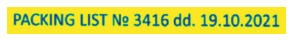

text extracted:  PACKING LIST Ne 3416 dd. 19.10.2021


Cluster 1


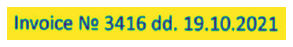

text extracted:  Invoice No 3416 dd, 19.10.2021


Cluster 2


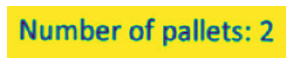

text extracted:  Number of pallets: 2


Cluster 3


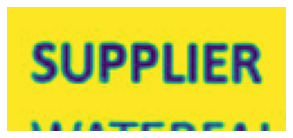

text extracted:  SUPPLIER


Cluster 4


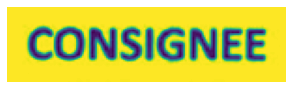

text extracted:  CONSIGNEE


Cluster 5


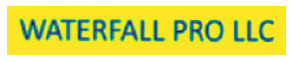

text extracted:  WATERFALL PRO LLC


Cluster 6


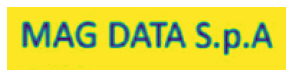

text extracted:  MAG DATA S.p.A


Cluster 7


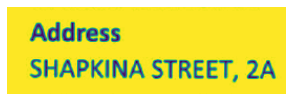

text extracted:  Address
SHAPKINA STREET, 2A


Cluster 8


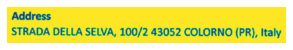

text extracted:  Address
STRADA DELLA SELVA, 100/2 43052 COLORNO (PR), Italy


Cluster 9


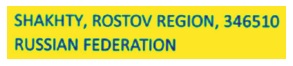

text extracted:  SHAKHTY, ROSTOV REGION, 346510
RUSSIAN FEDERATION


Cluster 10


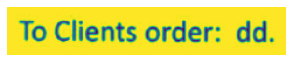

text extracted:  To Clients order: dd.


Cluster 11


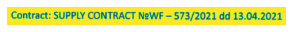

text extracted:  Contract: SUPPLY CONTRACT NeWF — 573/2021 dd 13.04.2021


Cluster 12


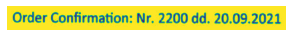

text extracted:  Order Confirmation: Nr. 2200 dd. 20.09.2021


Cluster 13


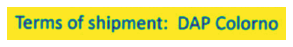

text extracted:  Terms of shipment: DAP Colorno


Cluster 14


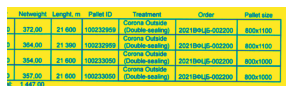

text extracted:  Netweight_Lenght,m Pallet ID Treatment Order Pallet size

Corona Outside

372,00 21 600 00232959 | (Double-sealing) | 2021B®L|5-002200 800x1100
Corona Outside

21390 00232959 | (Double-sealing) | 2021BOL\6-002200 800x1100
Corona Outside

354,00 100233050 | (Double-sealing) | 2021BOL\5-002200

Corona Outside

100233050 | (Double-sealing) | 2021BOL{b-002200 | 800x1000

      
     
     

 

 

   


Cluster 15


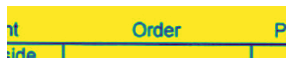

text extracted:  Order

 


Cluster 16


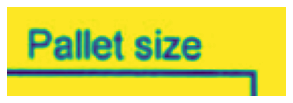

text extracted:  Pallet size


Cluster 17


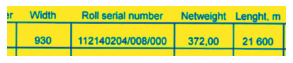

text extracted:  r= Width Roll serialnumber __Netweight Lenght, m

ra 112140204/008/000 | _372,00 2060 |

      


Cluster 18


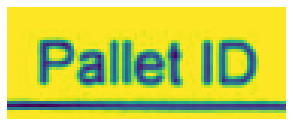

text extracted:  Pallet ID


Cluster 19


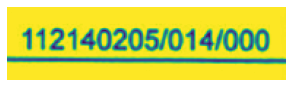

text extracted:  112140205/014/000


Cluster 20


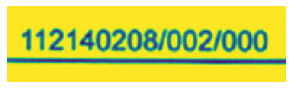

text extracted:  112140208/002/000


Cluster 21


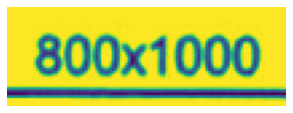

text extracted:  800x1000


Cluster 22


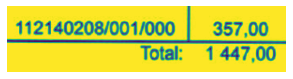

text extracted:  112140208/001/000 357,00

Total: 1 447,00


Cluster 23


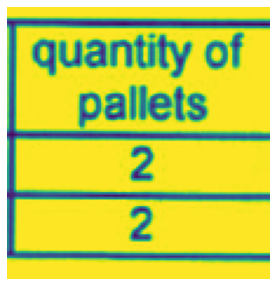

text extracted:  quantity of
pallets

 


Cluster 24


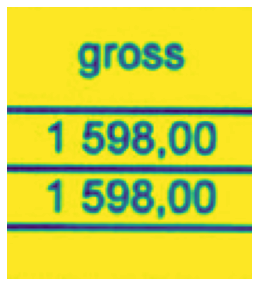

text extracted:  gross

1 598,00
1 598,00


Cluster 25


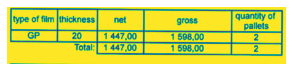

text extracted:    
  

quantity of
pallets

 

 
  
 

GP [ 20 ‘| 1 447,00 1 598,00
Total: 1 598,00

 


Cluster 26


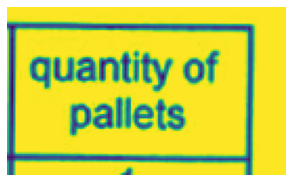

text extracted:   


Cluster 27


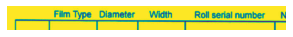

text extracted:  Film Type Diameter Width Roll serial number __N


Cluster 28


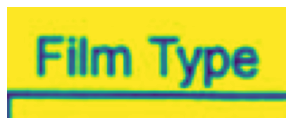

text extracted:  Film Type
eat


Cluster 29


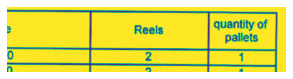

text extracted:  quantity of
a

 


Cluster 30


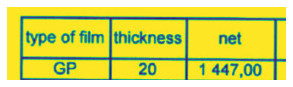

text extracted:  al

 

GP


Cluster 31


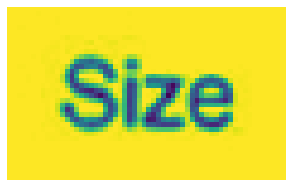

text extracted:  Size


Cluster 32


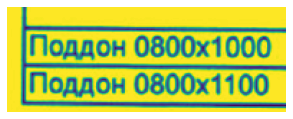

text extracted:  Mopgox 0800x1000
Moaaox 0800x1100


Cluster 33


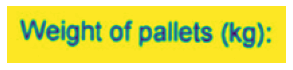

text extracted:  Weight of pallets (kg):


Cluster 34


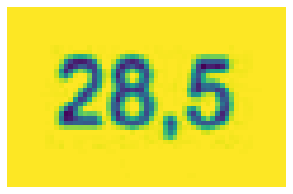

text extracted:  28,5


Cluster 35


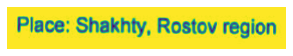

text extracted:  Place: Shakhty, Rostov region


Cluster 36


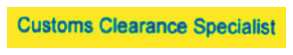

text extracted:  Customs Clearance Specialist


Cluster 37


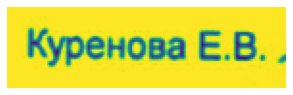

text extracted:  Kypexosa E.B. .




In [16]:
img = cv2.imread(receipt_files[1]) 
to_pop_list = []

for cluster in dico_area_location:
    [bottom_left, top_right] = dico_area_location[cluster]
    pad = 4 #  add some pixels around cluster area
    img_crop = img[ bottom_left[1] - pad :top_right[1] + pad, bottom_left[0] - pad:top_right[0] + pad , :]
    # The cropped image can have weird shape and tesseract OCR is more accurate if we transform the cropped image as followed
    img_crop = cv2.resize(img_crop, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC) 
    img_crop = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
    # Run tesseract on the cropped image
    text = pytesseract.image_to_string(img_crop)
    if text != '': 
        print('Cluster {}'.format(cluster))
        plt.figure(figsize=(5,5))
        plt.imshow(img_crop)
        plt.axis('off')
        plt.show()
        print('text extracted: ', text)
        print()
        dico_area_location[cluster].append(text)
    else:
        to_pop_list.append(cluster)
        
# Remove area without text        
for i in to_pop_list:
    dico_area_location.pop(i)

# Ensure no key is skipped due to removal
dico_area_location_copy = {}
for en, key in enumerate(dico_area_location):
    dico_area_location_copy[en] = dico_area_location[key]
dico_area_location = dico_area_location_copy 

In [17]:
#The dictionnary displayed below shows that we have for each cluster, its location and the text it contains.
dico_area_location

{0: [(43, 38), (386, 64), 'PACKING LIST Ne 3416 dd. 19.10.2021\n\x0c'],
 1: [(43, 67), (330, 94), 'Invoice No 3416 dd, 19.10.2021\n\x0c'],
 2: [(42, 97), (232, 126), 'Number of pallets: 2\n\x0c'],
 3: [(41, 152), (136, 190), 'SUPPLIER\n\x0c'],
 4: [(519, 158), (635, 183), 'CONSIGNEE\n\x0c'],
 5: [(41, 185), (230, 211), 'WATERFALL PRO LLC\n\x0c'],
 6: [(520, 187), (674, 216), 'MAG DATA S.p.A\n\x0c'],
 7: [(31, 210), (245, 271), 'Address\nSHAPKINA STREET, 2A\n\x0c'],
 8: [(519, 216),
  (1028, 275),
  'Address\nSTRADA DELLA SELVA, 100/2 43052 COLORNO (PR), Italy\n\x0c'],
 9: [(40, 271),
  (369, 326),
  'SHAKHTY, ROSTOV REGION, 346510\nRUSSIAN FEDERATION\n\x0c'],
 10: [(40, 329), (231, 355), 'To Clients order: dd.\n\x0c'],
 11: [(40, 359),
  (601, 388),
  'Contract: SUPPLY CONTRACT NeWF — 573/2021 dd 13.04.2021\n\x0c'],
 12: [(40, 388),
  (449, 415),
  'Order Confirmation: Nr. 2200 dd. 20.09.2021\n\x0c'],
 13: [(39, 417), (342, 446), 'Terms of shipment: DAP Colorno\n\x0c'],
 14: [(501, 486

In [18]:
# Get the center of each cluster

middle_points = []
for cluster in dico_area_location:
    rect = dico_area_location[cluster][:2]
    middle_points.append([np.mean([rect[0][0],rect[1][0]]),np.mean([rect[0][1],rect[1][1]])])
middle_points

[[214.5, 51.0],
 [186.5, 80.5],
 [137.0, 111.5],
 [88.5, 171.0],
 [577.0, 170.5],
 [135.5, 198.0],
 [597.0, 201.5],
 [138.0, 240.5],
 [773.5, 245.5],
 [204.5, 298.5],
 [135.5, 342.0],
 [320.5, 373.5],
 [244.5, 401.5],
 [190.5, 431.5],
 [857.0, 583.5],
 [1002.5, 503.5],
 [1159.5, 505.5],
 [472.0, 523.5],
 [737.5, 500.5],
 [433.5, 581.0],
 [434.0, 620.5],
 [1145.5, 622.5],
 [478.0, 668.0],
 [559.5, 778.5],
 [430.5, 786.5],
 [354.5, 782.5],
 [567.5, 865.5],
 [280.0, 504.5],
 [144.0, 499.0],
 [427.0, 877.5],
 [222.5, 758.0],
 [222.0, 862.0],
 [169.0, 906.5],
 [428.5, 968.5],
 [587.5, 969.0],
 [458.0, 1011.5],
 [457.0, 1059.0],
 [660.5, 1147.5]]

In [19]:
x_axis = list(np.array(middle_points).T[0])
y_axis = list(np.array(middle_points).T[1])
zeros = list(np.zeros(np.array(middle_points).T[0].shape))
x_for_clustering = np.array([x_axis,zeros]).T
y_for_clustering = np.array([zeros,y_axis]).T

In [20]:
clustering_x = DBSCAN(eps=40, min_samples=1).fit_predict(x_for_clustering)
clustering_y = DBSCAN(eps=40, min_samples=1).fit_predict(y_for_clustering)

In [21]:
nb_line = len(set(clustering_y))
nb_columns = len(set(clustering_x))

## Sort the clusters

In [22]:
def sort_cluster(clustering, axis):
    """
    args:
        - clustering: array (output of clustering on the axis)
        - axis : x_axix or y_axis defined above.
    Returns:
        - a mapping dictionnary. The objective is to sort cluster number with respect to their x or y average value
    """
    L_means = []
    for num_cluster in range(max(clustering)+1):
        wh_cluster = np.where(clustering == num_cluster)
        L_points = []
        for index in wh_cluster[0]:
            point = axis[index]
            L_points.append(point)
        mean = np.mean(np.array(L_points))
        L_means.append(mean)
    sorted_args = np.argsort(L_means)
    mapping_cluster = {}
    for en, cluster_num in enumerate(sorted_args):
        mapping_cluster[en] = cluster_num
    
    return mapping_cluster

mapping_cluster = sort_cluster(clustering_x, x_axis)  

## draw the table just like in the PDF

In [23]:
table_data = []
for num_cluster_y in range(max(clustering_y)):
    wh_cluster_y = np.where(clustering_y == num_cluster_y)
    line = [' ' for i in range(nb_columns)]
    for index in wh_cluster_y[0]:
        num_cluster_x = clustering_x[index]
        num_cluster_x = mapping_cluster[num_cluster_x]
        text = dico_area_location[int(index)][2]
        line[int(num_cluster_x)] = text
    table_data.append(line)
table_data        

[[' ', 'Number of pallets: 2\n\x0c', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
 ['SUPPLIER\n\x0c',
  'Address\nSHAPKINA STREET, 2A\n\x0c',
  ' ',
  ' ',
  'MAG DATA S.p.A\n\x0c',
  ' ',
  ' ',
  ' ',
  'Address\nSTRADA DELLA SELVA, 100/2 43052 COLORNO (PR), Italy\n\x0c',
  ' '],
 [' ',
  'SHAKHTY, ROSTOV REGION, 346510\nRUSSIAN FEDERATION\n\x0c',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' '],
 [' ',
  'Terms of shipment: DAP Colorno\n\x0c',
  'Contract: SUPPLY CONTRACT NeWF — 573/2021 dd 13.04.2021\n\x0c',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' ',
  ' '],
 [' ',
  ' ',
  ' ',
  ' ',
  ' ',
  '800x1000\n\x0c',
  '112140208/002/000\n\x0c',
  ' ',
  ' ',
  'Netweight_Lenght,m Pallet ID Treatment Order Pallet size\n\nCorona Outside\n\n372,00 21 600 00232959 | (Double-sealing) | 2021B®L|5-002200 800x1100\nCorona Outside\n\n21390 00232959 | (Double-sealing) | 2021BOL\\6-002200 800x1100\nCorona Outside\n\n354,00 100233050 | (Double-sealing) | 2021BOL\\5-002200\n\nCorona Outside\n\n10

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12 () missing from current font.
  :meth:`safe_execfile` method of IPython.


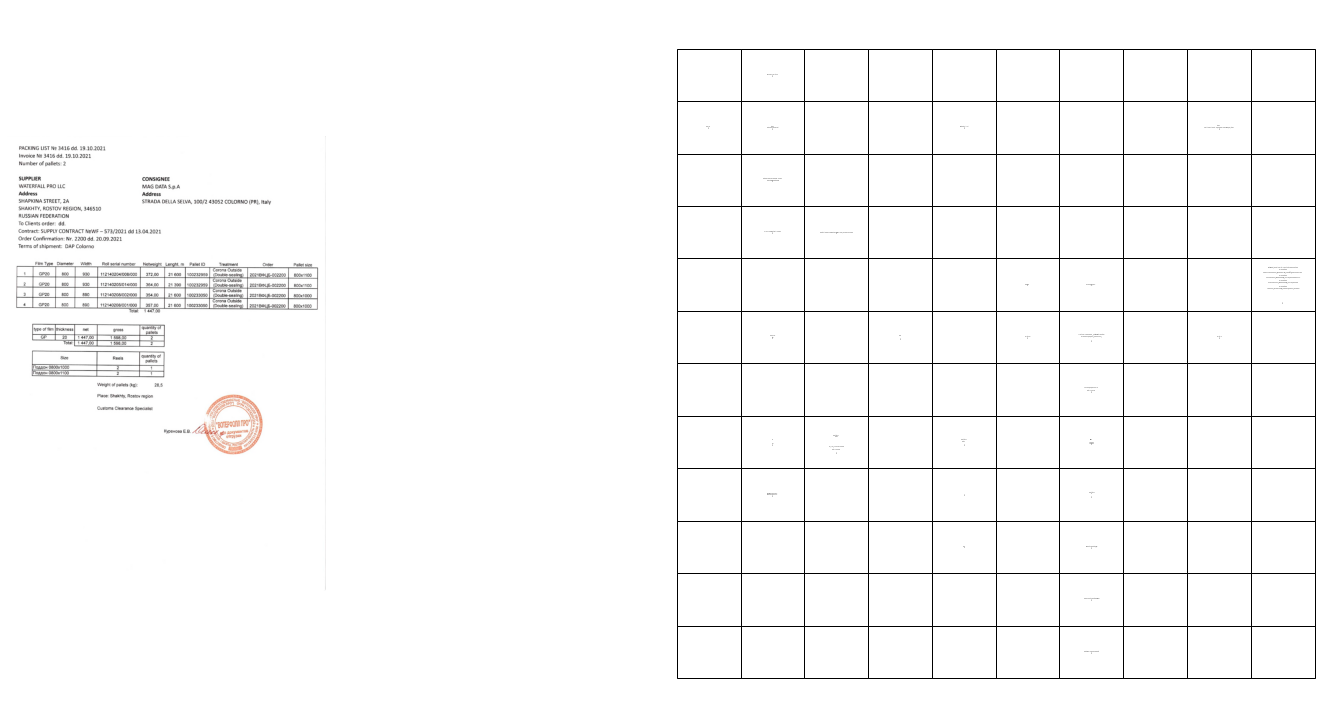

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12,12))

axes[0].imshow(img)
axes[0].axis("off")  

table = axes[1].table(cellText=table_data, loc='right', cellLoc='center')
table.set_fontsize(60)
table.scale(2,4)
axes[1].axis("off")  

#plt.tight_layout()
plt.subplots_adjust(top=0.95, wspace=0.1, hspace=0)
plt.show()